In [1]:
import pandas as pd
import numpy as np
coilData =pd.read_csv('CoilHistory.csv')
operData =pd.read_csv('OperationsDetail.csv')

/Users/celiahah/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,43,68,98) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Select useful attributes with dictionary
coilDict = [0,2,3,4,5,6,8,9,11,14,15,16,20,21,31,32,33,34,36,37,38,39,40,41,44,45,46,48,49,50,51,52,53,54,56,57,58,59,
           61,62,63,64,65,66,68,69,70,71,73,74,75,76,77,78,79,80]
operDict  = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,25]
coil = coilData.iloc[:,coilDict]
oper = operData.iloc[:,operDict]

In [4]:
#Part1: Missing Value Analysis
missing =coil.replace(" ",np.nan)
missing =missing.replace("  ",np.nan)
missing =missing.replace("   ",np.nan)
missing =missing.replace("    ",np.nan)
missing =missing.replace("     ",np.nan)
missing =missing.replace("      ",np.nan)
missing =missing.replace("       ",np.nan)
missing =missing.replace("        ",np.nan)

total_missing = missing.isnull().sum().sort_values(ascending = False)
percent_missing = (missing.isnull().sum()/missing.isnull().count()*100).sort_values(ascending = False)
missing4  = pd.concat([total_missing, percent_missing], axis=1, keys=['Total_Missing', 'Percent_Missing(%)'])
print("\n-----------Missing Value is--------------\n",missing4)


-----------Missing Value is--------------
         Total_Missing  Percent_Missing(%)
INUCLS         223275           81.493175
INUNIT         223229           81.476385
INMINL          33543           12.242864
INMAJL          33466           12.214760
INFNXO          29474           10.757720
INFNXU          29188           10.653332
INSNXO           8684            3.169574
INSNXU           8400            3.065917
INVCLK           8017            2.926126
INSWMC           3794            1.384773
INFWMC           3262            1.190598
INUOM            2965            1.082196
INFSHF           1172            0.427768
INFHLD            141            0.051464
INFENT            102            0.037229
INSHLD             80            0.029199
INFACT             74            0.027009
INHEAT             28            0.010220
INSENT             28            0.010220
INSACT              0            0.000000
INSRSQ              0            0.000000
INSSTA              0           

In [5]:
#Drop the attributes which have more than 50% missing value
coil_1 = coil.drop(['INUCLS','INUNIT','INFNXO','INFNXU','INMAJL','INMINL','INSTRN','INTRST'], axis=1)
coil_1.head()

,INVID#,INTYPE,INDENS,INUOM,INHEAT,INVCOM,IN#PAS,INALLY,INVCLK,INSENT,...,INFTIM,INFGWT,INFLBS,INFWMC,INFSCL,INFFOT,INFPCS,INFTRN,INFTMS,INELAP
0,420000,C,0.317,LBS,22889,...,0,226,44RL,13599,...,84425,20485,20485,CALC,PROCESINFO,3979,1,044UNLOAD,2019-06-11 08:44:24.893000,63
1,420000,C,0.317,LBS,22889,...,0,226,147,13599,...,201302,20485,20485,CALC,PROCESINFO,3979,1,LOADSTND,2019-06-11 20:13:02.019742,688
2,420000,C,0.317,LBS,22889,...,0,226,147,13599,...,214242,20485,20485,CALC,FOOTAGE,3985,1,UNLOADSTND,2019-06-11 21:42:42.162513,0
3,420000,C,0.317,LBS,22889,...,0,226,046,13599,...,174243,20485,20485,CALC,FOOTAGE,3985,1,LOADROLL,2019-06-12 17:42:43.189322,0
4,420000,C,0.317,LBS,22889,...,2,226,046,13599,...,180729,18913,18913,CALC,PLCFOOT,7888,1,UNLOADROLL,2019-06-12 18:07:29.016738,0


In [6]:
#Transform Data Type
cols = coil_1.columns.tolist()
#Describe the variables
cat_vars = []
print ("\n the catagorical attributes are:")
for col in cols:
    if coil_1[col].dtype == "object":
        print (col)
        cat_vars.append(col)

#Use LableEncoder to transform data type
print ("\n Start transform attributes...")       
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in cat_vars:
    tran = le.fit_transform(coil_1[col].tolist())
    tran_df = pd.DataFrame(tran, columns=['num_'+col])
    print("{col} is transformed into {num_col}".format(col=col,num_col='num_'+col))
#    print (le.classes_)
    coil_1 = pd.concat([coil_1, tran_df], axis=1)


 the catagorical attributes are:
INVID#
INTYPE
INUOM
INHEAT
INVCOM
INALLY
INVCLK
INSENT
INSNXO
INSNXU
INSACT
INSSTA
INSHLD
INSWMC
INSSCL
INSTMS
INFENT
INFACT
INFSTA
INFHLD
INFSHF
INFWMC
INFSCL
INFTRN
INFTMS

 Start transform attributes...
INVID# is transformed into num_INVID#
INTYPE is transformed into num_INTYPE
INUOM is transformed into num_INUOM
INHEAT is transformed into num_INHEAT
INVCOM is transformed into num_INVCOM
INALLY is transformed into num_INALLY
INVCLK is transformed into num_INVCLK
INSENT is transformed into num_INSENT
INSNXO is transformed into num_INSNXO
INSNXU is transformed into num_INSNXU
INSACT is transformed into num_INSACT
INSSTA is transformed into num_INSSTA
INSHLD is transformed into num_INSHLD
INSWMC is transformed into num_INSWMC
INSSCL is transformed into num_INSSCL
INSTMS is transformed into num_INSTMS
INFENT is transformed into num_INFENT
INFACT is transformed into num_INFACT
INFSTA is transformed into num_INFSTA
INFHLD is transformed into num_INFHLD
IN

In [7]:
#Adjust for some attributes which should NOT be categorical variables
coil_2 = coil_1.drop(['num_INSTMS','num_INFTMS'], axis=1)
#coil_2[['INELAP']] = coil_2[['INELAP']].apply(pd.to_numeric)

#Add New Attribute
coil_2['yield loss']=(coil_2['INFGWT']-coil_2['INSLBS'])/coil_2['INSLBS']
coil_2.shape[1]

72

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Types of Features
#Type of Machine
#1.Distribution of Some Selected Attributes
coil_2.loc[:,'INSNXO'].value_counts()
coil_2.loc[:,'INSRSQ'].value_counts()
coil_2.loc[:,'INSENT'].value_counts()
coil_2.loc[:,'INALLY'].value_counts()
coil_2.loc[:,'INDENS'].value_counts()


0.308    79821
0.323    68381
0.322    46597
0.321    32128
0.320    29288
0.316     6838
0.318     5465
0.317     2860
0.306     1724
0.303      328
0.319      305
0.313      209
0.000       36
Name: INDENS, dtype: int64

In [9]:
coil_2.loc[:,'INHEAT'].value_counts()

8261     473
8260     356
16679    342
18356    304
18357    303
        ... 
21852      1
74289      1
17959      1
17836      1
47960      1
Name: INHEAT, Length: 8698, dtype: int64

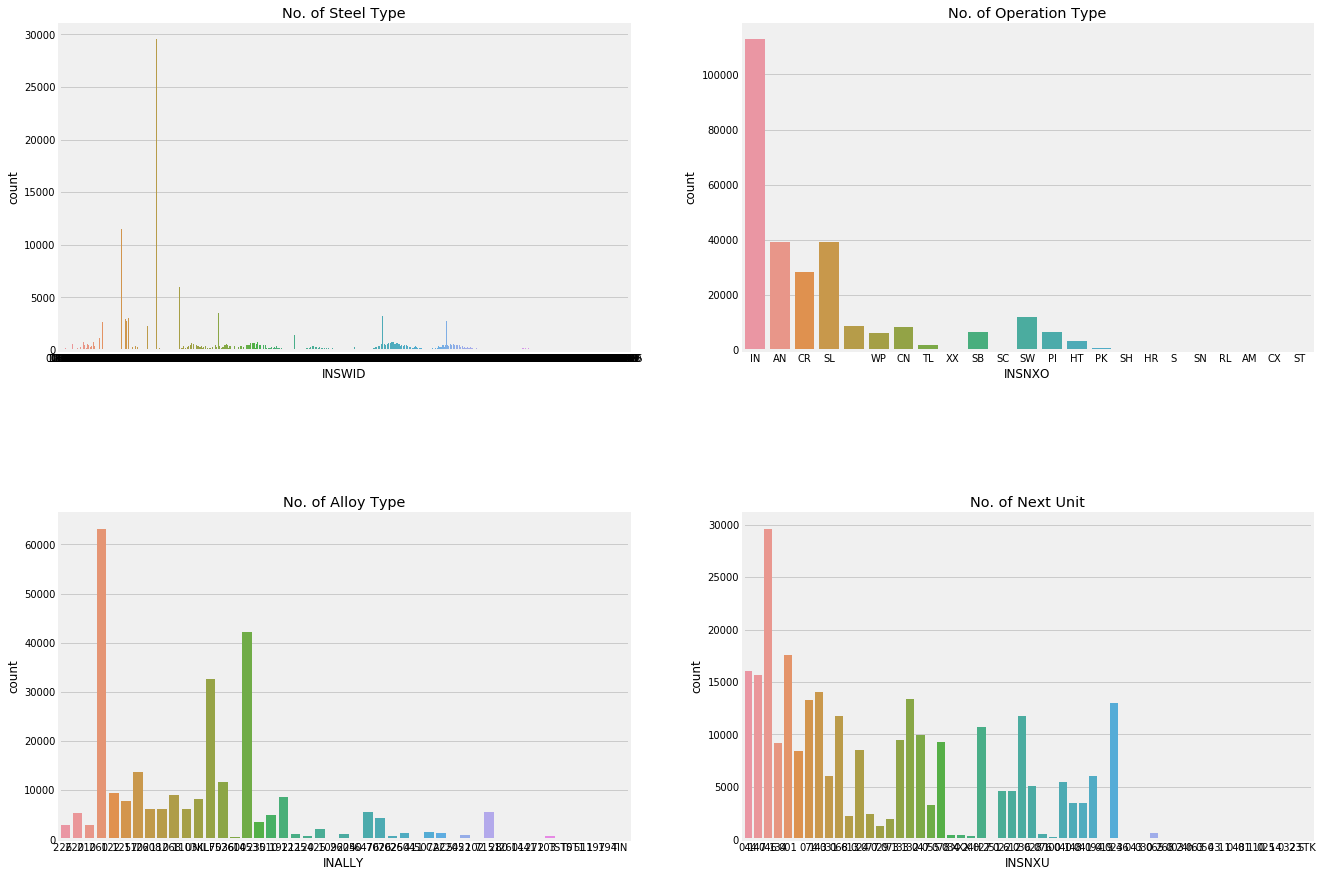

In [11]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('INSWID',data=coil_2,ax=ax[0,0])
ax[0,0].set_title('No. of Steel Type')
sns.countplot('INSNXO',data=coil_2,ax=ax[0,1])
ax[0,1].set_title('No. of Operation Type')
sns.countplot('INALLY',data=coil_2,ax=ax[1,0])
ax[1,0].set_title('No. of Alloy Type')
sns.countplot('INSNXU',data=coil_2,ax=ax[1,1])
ax[1,1].set_title('No. of Next Unit')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [12]:
waitData=coil_2[coil_2['INSNXO']=="IN"]

In [13]:
waitData['prev_time'] = waitData.groupby(['INVID#'])['INFTMS'].shift(1)
waitData['prev_time']

0                                NaN
2         2019-06-11 08:44:24.893000
4         2019-06-11 21:42:42.162513
6         2019-06-12 18:07:29.016738
10        2019-06-15 08:28:28.202985
                     ...            
273916    2020-01-31 21:40:54.423000
273918    2020-02-03 22:11:44.441856
273923                           NaN
273929                           NaN
273933    2020-02-06 19:16:01.139000
Name: prev_time, Length: 112687, dtype: object

In [14]:
a=[]
for i in range(len(waitData)):
        if pd.isnull(waitData["prev_time"][waitData.index[i]])==False:
           b =waitData.index[i]-waitData.index[i-1]-1
        else:
            b=0
        a.append(b)
waitData['count_steps']=a          

In [32]:
coil_2.columns

Index(['INVID#', 'INTYPE', 'INDENS', 'INUOM', 'INHEAT', 'INVCOM', 'IN#PAS',
       'INALLY', 'INVCLK', 'INSENT', 'INSRSQ', 'INSNXO', 'INSNXU', 'INSACT',
       'INSSTA', 'INSHLD', 'INSWID', 'INSGAG', 'INSLEN', 'INSDAT', 'INSTIM',
       'INSGWT', 'INSLBS', 'INSWMC', 'INSSCL', 'INSFOT', 'INSPCS', 'INSTMS',
       'INFENT', 'INFRSQ', 'INFACT', 'INFSTA', 'INFHLD', 'INFWID', 'INFGAG',
       'INFLEN', 'INFSHF', 'INFDAT', 'INFTIM', 'INFGWT', 'INFLBS', 'INFWMC',
       'INFSCL', 'INFFOT', 'INFPCS', 'INFTRN', 'INFTMS', 'INELAP',
       'num_INVID#', 'num_INTYPE', 'num_INUOM', 'num_INHEAT', 'num_INVCOM',
       'num_INALLY', 'num_INVCLK', 'num_INSENT', 'num_INSNXO', 'num_INSNXU',
       'num_INSACT', 'num_INSSTA', 'num_INSHLD', 'num_INSWMC', 'num_INSSCL',
       'num_INFENT', 'num_INFACT', 'num_INFSTA', 'num_INFHLD', 'num_INFSHF',
       'num_INFWMC', 'num_INFSCL', 'num_INFTRN', 'yield loss'],
      dtype='object')

In [35]:
#waitData[['INSENT','INSNXO','count_steps']]
coil_2[["INSGWT","INFGWT","yield loss"]]

,INSGWT,INFGWT,yield loss
0,20674,20485,-0.009142
1,20485,20485,0.000000
2,20485,20485,0.000000
3,20485,20485,0.000000
4,20485,18913,-0.076739
...,...,...,...
273975,1,1,0.000000
273976,1,1,0.000000
273977,1,1,0.000000
273978,1,1,0.000000


In [15]:
import datetime

def interval_seconds(prev,start):
    if pd.isnull(prev)==False:
        prev=str(prev)
        prev=prev[0:19]
        start=str(start)
        start=start[0:19]
        prev=datetime.datetime.strptime(prev, '%Y-%m-%d %H:%M:%S')
        start=datetime.datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
        i=start-prev
        i=i.seconds
    else:
        i=0
    return(i)

def interval_days(prev,start):
    if pd.isnull(prev)==False:
        prev=str(prev)
        prev=prev[0:19]
        start=str(start)
        start=start[0:19]
        prev=datetime.datetime.strptime(prev, '%Y-%m-%d %H:%M:%S')
        start=datetime.datetime.strptime(start, '%Y-%m-%d %H:%M:%S')
        i=start-prev
        i=i.days
    else:
        i=0
    return(i)

waitData['w1'] = waitData.apply(lambda x: interval_seconds(x.prev_time,x.INSTMS), axis = 1).to_frame()
waitData['w2'] = waitData.apply(lambda x: interval_days(x.prev_time,x.INSTMS), axis = 1).to_frame()
waitData['waitTime']=waitData['w1']+waitData['w2']*86400

waitData= waitData.drop(['w1','w2'], axis=1)

In [16]:
#Use hour as waitTime unit
waitData['waitTime']=waitData['waitTime']/3600

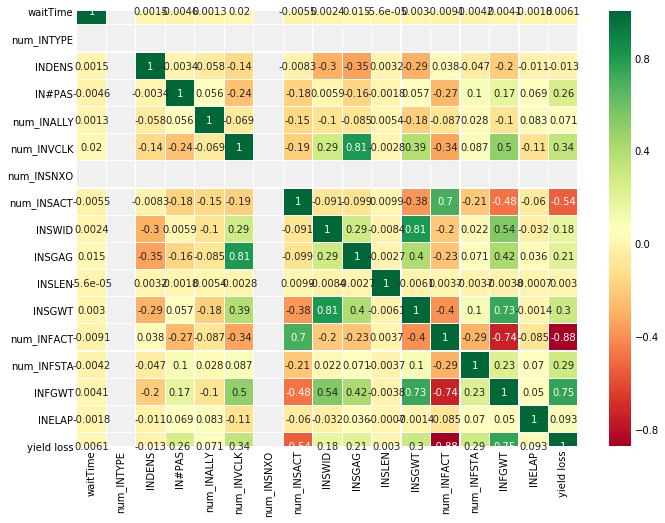

In [17]:
#-------Step1: correlation between waiting time and attributes--------
corrData = waitData[['waitTime','num_INTYPE','INDENS','INHEAT','IN#PAS','INALLY','num_INALLY','num_INVCLK','num_INSNXO','num_INSACT','INSWID','INSGAG','INSLEN','INSGWT','num_INFACT','num_INFSTA','INFGWT','INELAP','yield loss']]
sns.heatmap(corrData.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [18]:
#----Step2: the waitTime VS. attributes------
#1. Width
waitData['INSWID'].describe()

count    112687.000000
mean         28.347190
std          10.249416
min           1.625000
25%          25.000000
50%          27.410000
75%          38.230000
max          51.650000
Name: INSWID, dtype: float64

In [19]:
waitData['waitTime'].describe()

count    1.126870e+05
mean     3.037831e+03
std      2.297402e+05
min     -7.344111e+01
25%      0.000000e+00
50%      2.040500e+01
75%      6.333292e+01
max      1.769905e+07
Name: waitTime, dtype: float64

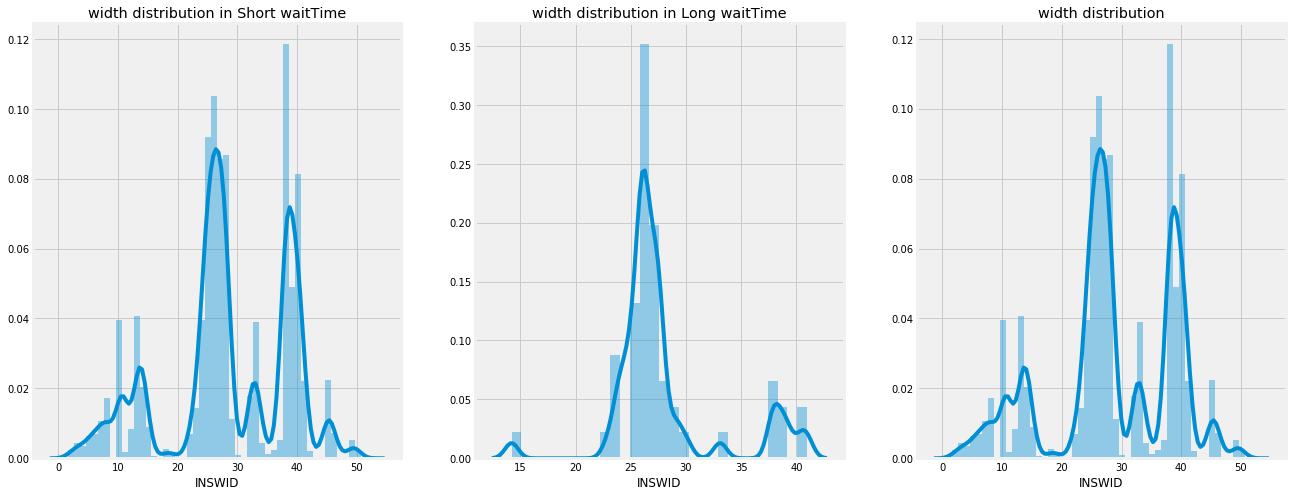

In [20]:
f,ax=plt.subplots(1,3,figsize=(20,8))
temp=waitData['waitTime']
sns.distplot(waitData[waitData['waitTime']<=temp.mean(axis=0)].INSWID,ax=ax[0])
ax[0].set_title('width distribution in Short waitTime')

sns.distplot(waitData[waitData['waitTime']>temp.mean(axis=0)].INSWID,ax=ax[1])
ax[1].set_title('width distribution in Long waitTime')

sns.distplot(waitData.INSWID,ax=ax[2])
ax[2].set_title('width distribution')
plt.show()

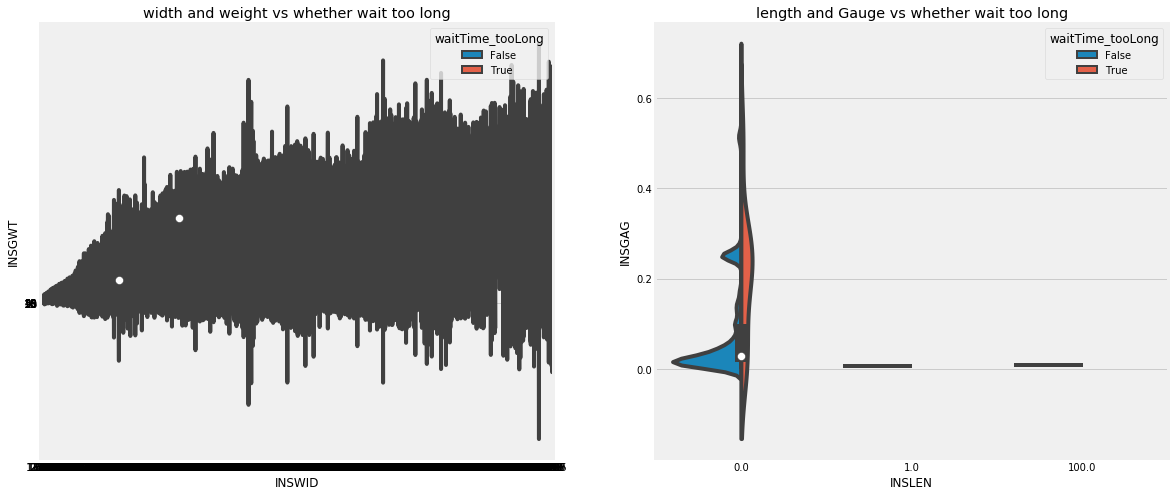

In [21]:
###🔥别忘记，看看怎么归纳有限type
f,ax=plt.subplots(1,2,figsize=(18,8))
waitData["waitTime_tooLong"]= (waitData['waitTime']>=1.822699e+05)
sns.violinplot("INSWID","INSGWT", hue="waitTime_tooLong", data=waitData,split=True,ax=ax[0])
ax[0].set_title('width and weight vs whether wait too long')
ax[0].set_yticks(range(0,55,5))
sns.violinplot("INSLEN","INSGAG", hue="waitTime_tooLong", data=waitData,split=True,ax=ax[1])
ax[1].set_title('length and Gauge vs whether wait too long')
#ax[1].set_yticks(range(0,0.8,0.1))
plt.show()

In [22]:
#2. Gauge
waitData['INSGAG'].describe()

count    112687.000000
mean          0.078261
std           0.106406
min           0.000000
25%           0.015610
50%           0.028000
75%           0.100000
max           0.700000
Name: INSGAG, dtype: float64

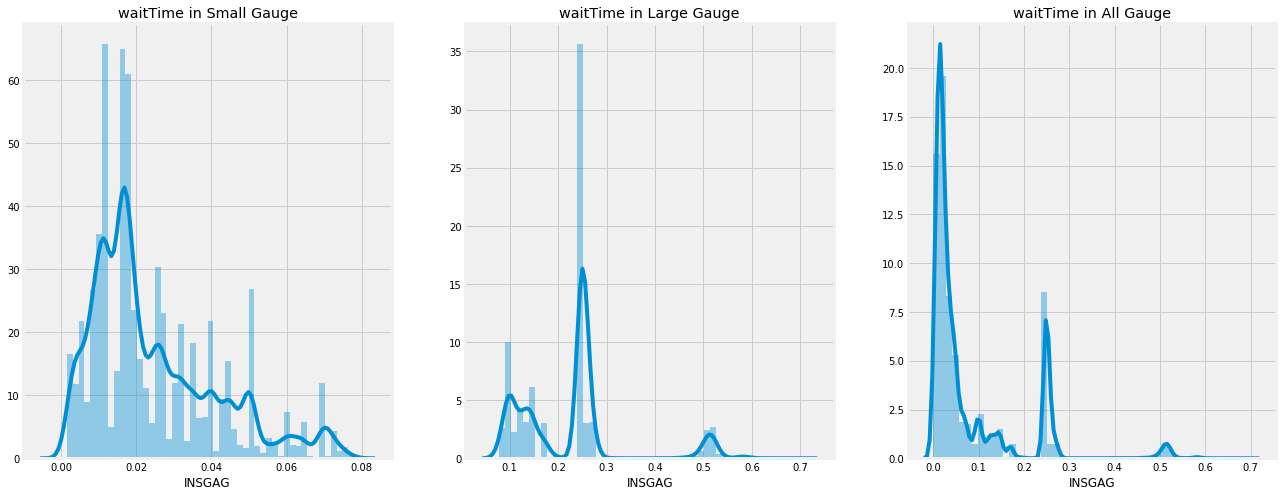

In [23]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(waitData[waitData['INSGAG']<=0.078261].INSGAG,ax=ax[0])
ax[0].set_title('waitTime in Small Gauge')
sns.distplot(waitData[waitData['INSGAG']>0.078261].INSGAG,ax=ax[1])
ax[1].set_title('waitTime in Large Gauge')
sns.distplot(waitData.INSGAG,ax=ax[2])
ax[2].set_title('waitTime in All Gauge')
plt.show()

In [24]:
#-------Step3:Feature Engineering------------
##---------Transform Categorical Variable--------###
pick_x_cat =[4,7,12,13,14,15,24,29,36,42]
pick_x=[2,6,10,16,17,18,21,22,25,26,30,33,34,35,39,40,43,44,47,71,73]+pick_x_cat
pick_y=[74]                                                  

waitData=waitData.dropna() 
x = waitData.iloc[:,pick_x]
y = waitData.iloc[:,pick_y]

In [25]:
#Make Sankey Diagram
x.to_csv("x_sankey.csv",index=False,sep=',')
y.to_csv("y_sankey.csv",index=False,sep=',')

In [26]:
##-----------Method1:Target Encoding-----------
from sklearn.base import BaseEstimator, TransformerMixin
class TargetEncoder(BaseEstimator, TransformerMixin):
    """Target encoder.
    
    Replaces categorical column(s) with the mean target value for
    each category.

    """
    
    def __init__(self, cols=None):
        """Target encoder
        
        Parameters
        ----------
        cols : list of str
            Columns to target encode.  Default is to target 
            encode all categorical columns in the DataFrame.
        """
        if isinstance(cols, str):
            self.cols = [cols]
        else:
            self.cols = cols
        
        
    def fit(self, X, y):
        """Fit target encoder to X and y
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : encoder
            Returns self.
        """
        
        # Encode all categorical cols by default
        if self.cols is None:
            self.cols = [col for col in X 
                         if str(X[col].dtype)=='object']

        # Check columns are in X
        for col in self.cols:
            if col not in X:
                raise ValueError('Column \''+col+'\' not in X')

        # Encode each element of each column
        self.maps = dict() #dict to store map for each column
        for col in self.cols:
            tmap = dict()
            uniques = X[col].unique()
            for unique in uniques:
                tmap[unique] = y[X[col]==unique].mean()
            self.maps[col] = tmap
            
        return self

        
    def transform(self, X, y=None):
        """Perform the target encoding transformation.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
            
        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        Xo = X.copy()
        for col, tmap in self.maps.items():
            vals = np.full(X.shape[0], np.nan)
            for val, mean_target in tmap.items():
                vals[X[col]==val] = mean_target
            Xo[col] = vals
        return Xo
            
            
    def fit_transform(self, X, y=None):
        """Fit and transform the data via target encoding.
        
        Parameters
        ----------
        X : pandas DataFrame, shape [n_samples, n_columns]
            DataFrame containing columns to encode
        y : pandas Series, shape = [n_samples]
            Target values (required!).

        Returns
        -------
        pandas DataFrame
            Input DataFrame with transformed columns
        """
        return self.fit(X, y).transform(X, y)

In [27]:
# Target encode the categorical data
te = TargetEncoder()
x_target_encoded = te.fit_transform(x, y)
x_target_encoded.shape[0]

79044

In [28]:
#according to attribute meaning --> INALLOY divided according to the first digit;
#x_target_encoded["INALLY"]=str(x["INALLY"])[0]
x_target_encoded['INALLY']=x['INALLY'].apply(lambda x: x[0])

In [29]:
x_target_encoded["INALLY"]=x_target_encoded["INALLY"].replace("U",10)
x_target_encoded["INALLY"]=x_target_encoded["INALLY"].replace("K",11)
x_target_encoded["INALLY"]=x_target_encoded["INALLY"].replace("C",12)
x_target_encoded["INALLY"]=x_target_encoded["INALLY"].replace("T",13)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Embeded Method:
reg = LassoCV()
reg.fit(x_target_encoded, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x_target_encoded, y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 47520580.002436
Best score using built-in LassoCV: 0.687077


In [31]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 4 variables and eliminated the other 27 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

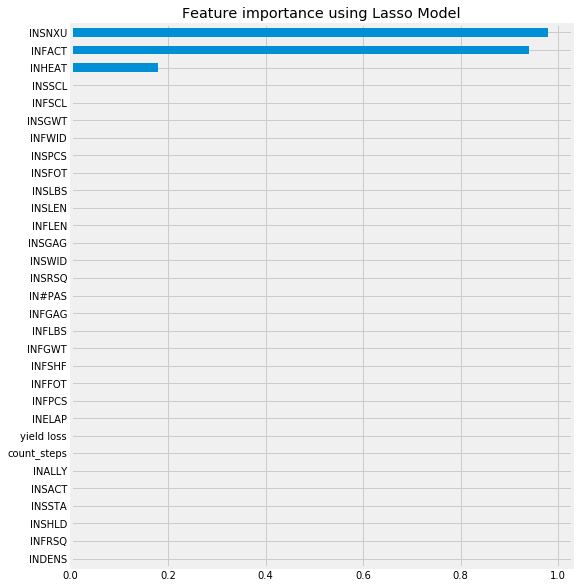

In [32]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [33]:
corrData = pd.concat( [x_target_encoded,y], axis=1 )
corrData

,INDENS,IN#PAS,INSRSQ,INSWID,INSGAG,INSLEN,INSGWT,INSLBS,INSFOT,INSPCS,...,INALLY,INSNXU,INSACT,INSSTA,INSHLD,INSSCL,INFRSQ,INFSHF,INFSCL,waitTime
2,0.317,0,40,38.67,0.0350,0.0,20485,20485,3979,1,...,2,2335.794021,5232.077576,4564.440669,4416.186210,74.273013,50,5115.391932,2334.934620,11.477222
4,0.317,2,50,38.67,0.0350,0.0,20485,20485,3985,1,...,2,1639.202101,5232.077576,4564.440669,4416.186210,1858.831337,60,5115.391932,1278.399977,20.000278
6,0.317,0,60,38.67,0.0163,0.0,18913,18913,7888,1,...,2,4778.049898,5232.077576,4564.440669,4416.186210,2822.864465,70,4904.858586,2334.934620,60.773611
10,0.317,0,60,38.67,0.0163,0.0,18913,18913,8432,1,...,2,4778.049898,5232.077576,134.388160,201.714861,1858.831337,70,4904.858586,2334.934620,73.026667
12,0.317,0,70,38.67,0.0163,0.0,18594,18594,0,1,...,2,92.640471,5232.077576,4564.440669,4416.186210,1858.831337,70,2437.459276,2334.934620,43.122778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273906,0.323,0,120,14.80,0.0120,0.0,6983,6983,0,1,...,1,192.128733,5232.077576,4564.440669,4416.186210,1990.477149,120,4904.858586,102.702431,42.755833
273913,0.323,0,90,14.80,0.0120,0.0,7149,7149,0,1,...,1,67.547359,5232.077576,4564.440669,4416.186210,1858.831337,100,5115.391932,102.702431,10.739167
273916,0.323,1,100,14.80,0.0120,0.0,7148,7148,0,1,...,1,106.958439,5232.077576,4564.440669,4416.186210,1990.477149,120,5115.391932,102.702431,71.003889
273918,0.323,0,120,14.80,0.0120,0.0,6983,6983,0,1,...,1,192.128733,5232.077576,4564.440669,4416.186210,1990.477149,120,4904.858586,102.702431,37.742500


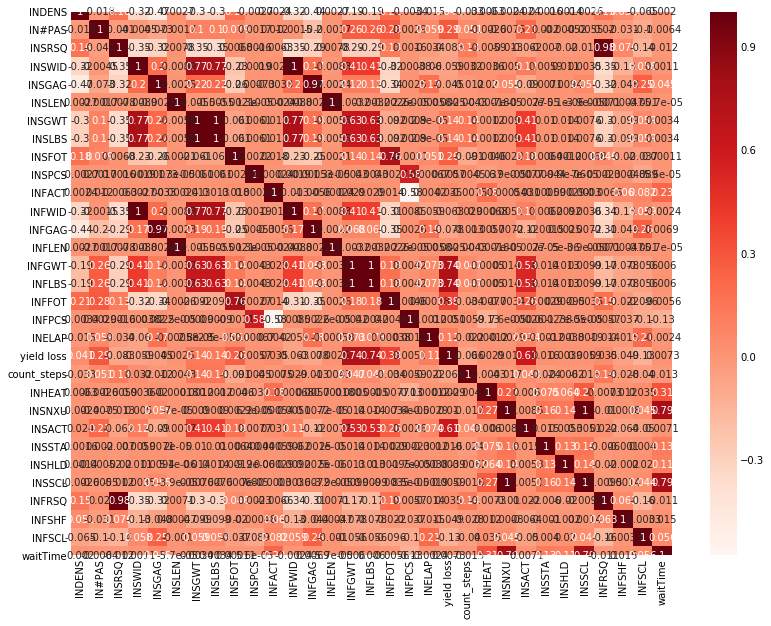

In [34]:
#Filter Method
#Using Pearson Correlation
corrData = pd.concat( [x_target_encoded,y], axis=1 )
plt.figure(figsize=(12,10))
cor = corrData.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
#Correlation with output variable
cor_target = abs(cor["waitTime"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

INSNXU      0.794730
INSSCL      0.794671
waitTime    1.000000
Name: waitTime, dtype: float64

In [36]:
#Wrapper Method
#Feed the features to the selected Machine Learning algorithm and based on the 
#model performance you add/remove the features.
#i. Backward Elimination
#Adding constant column of ones, mandatory for sm.OLS model
import statsmodels.api as sm

#Backward Elimination
cols = list(x_target_encoded.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x_new = x_target_encoded[cols]
    #x_new = sm.add_constant(x_new)
    model = sm.OLS(y,x_new.astype(float)).fit()
    p = pd.Series(model.pvalues.values[0:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


['INFACT', 'INFGWT', 'INFLBS', 'INHEAT', 'INALLY', 'INSNXU']


In [37]:
# RFE (Recursive Feature Elimination)
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x_target_encoded,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 0
Score with 0 features: 0.000000


In [38]:
rfe = RFE(model, 5)
#Transforming data using RFE
X_rfe = rfe.fit_transform(x_target_encoded,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True False False False False  True False False
  True False False False False  True False False False False False False
 False False False False False False False]
[ 1  2 11  6  1  4 23 21 22  1 12  5  1  3 14 15 18  1 19  7  9 17  8 13
 20 24 25 16 10 27 26]


In [39]:
x_target_encoded.columns #'INDENS', 'INSGAG',INFGAG','INSPCS', 'INFPCS'

Index(['INDENS', 'IN#PAS', 'INSRSQ', 'INSWID', 'INSGAG', 'INSLEN', 'INSGWT',
       'INSLBS', 'INSFOT', 'INSPCS', 'INFACT', 'INFWID', 'INFGAG', 'INFLEN',
       'INFGWT', 'INFLBS', 'INFFOT', 'INFPCS', 'INELAP', 'yield loss',
       'count_steps', 'INHEAT', 'INALLY', 'INSNXU', 'INSACT', 'INSSTA',
       'INSHLD', 'INSSCL', 'INFRSQ', 'INFSHF', 'INFSCL'],
      dtype='object')

In [40]:
#Conlusion: we will select:
#INDENS INSGAG INSPCS INFAG INFPCS
#INSXNU INFACT INHEAT
#INSSCL IN#PAS
#INALLY

In [41]:
x_sel =[0,1,4,9,10,12,17,20,21,22,23,26]
x_selected = x_target_encoded.iloc[:,x_sel]
x_selected

,INDENS,IN#PAS,INSGAG,INSPCS,INFACT,INFGAG,INFPCS,count_steps,INHEAT,INALLY,INSNXU,INSHLD
2,0.317,0,0.0350,1,5985.025265,0.0350,1,1,39.008673,2,2335.794021,4416.186210
4,0.317,2,0.0350,1,5985.025265,0.0163,1,1,39.008673,2,1639.202101,4416.186210
6,0.317,0,0.0163,1,5985.025265,0.0163,1,1,39.008673,2,4778.049898,4416.186210
10,0.317,0,0.0163,1,5985.025265,0.0163,1,3,39.008673,2,4778.049898,201.714861
12,0.317,0,0.0163,1,95.448376,0.0163,1,1,39.008673,2,92.640471,4416.186210
...,...,...,...,...,...,...,...,...,...,...,...,...
273906,0.323,0,0.0120,1,95.448376,0.0120,1,2,55.804105,1,192.128733,4416.186210
273913,0.323,0,0.0120,1,5985.025265,0.0120,1,2,55.804105,1,67.547359,4416.186210
273916,0.323,1,0.0120,1,5985.025265,0.0120,1,2,55.804105,1,106.958439,4416.186210
273918,0.323,0,0.0120,1,95.448376,0.0120,1,1,55.804105,1,192.128733,4416.186210


In [42]:
#Save files for further use
x_selected.to_csv("x_selected.csv",index=False,sep=',')
y.to_csv("y.csv",index=False,sep=',')

In [43]:
import pandas as pd
x_selected =pd.read_csv('x_selected.csv')
y =pd.read_csv('y.csv')

In [44]:
#####----------Build ML Model----------###########
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, train_test_split
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#------<Model1: LightGBM>----------
data_prepared = x_selected.astype(float)
data_labels = y.astype(int)

# Split into training and testing data
train_features, test_features, train_labels, test_labels = train_test_split(data_prepared, data_labels,random_state = 42)
get_ipython().system('pip install lightgbm')
import lightgbm as lgb

#Evaluation of the Model
# Visualization
plt.rcParams['font.size'] = 18
get_ipython().run_line_magic('matplotlib', 'inline')

# Governing choices for search
N_FOLDS = 5
MAX_EVALS = 5


In [45]:
# First we can create a model with the default value of hyperparameters and score it using cross validation with early stopping. Using the cv LightGBM function requires creating a Dataset.
# Note: here we use **Automated Hyperparameter Tuning**
#Establish a baseline model
from sklearn.model_selection import cross_val_score

base_LGBM = lgb.LGBMRegressor(random_state=50)
# Training set
train_set = lgb.Dataset(train_features, label = train_labels)
test_set = lgb.Dataset(test_features, label = test_labels)

# Default hyperparamters
hyperparameters = base_LGBM.get_params()
baseline_error = cross_val_score(base_LGBM, train_features, train_labels, scoring='neg_mean_squared_error', cv=10)
baseline_MSE_mean= baseline_error.mean()
print('The MSE for LGBM is:', baseline_MSE_mean)


# Train and make predicions with model
base_LGBM.fit(train_features, train_labels)
y_pred = base_LGBM.predict(test_features)

from sklearn.metrics import mean_squared_error
MSE_Test=mean_squared_error(test_labels, y_pred)
print('The baseline model scores {:.5f} RSE on the test set.'.format(MSE_Test))

The MSE for LGBM is: -25389412318.414467
The baseline model scores 53561680778.96225 RSE on the test set.


In [46]:
hyperparameters

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 50,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [53]:
#Tune the parameter
#----Hyper Parameter Tuning: Use GridSearchCV--------------
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import math
def lightGBM_model(X, y):
    gsc = GridSearchCV(
        estimator=lgb.LGBMRegressor(random_state=50),
        param_grid={
            'learning_rate': [0.01],
            'num_leaves': [24,50,80],
            'max_depth': [-1],
            'max_bin':[20,90],
            'min_child_samples': [20,30],
            'min_child_weight':[0.001],
            'n_estimators':[100,200],
            'subsample': [0.01, 1.0] ,
            'subsample_for_bin':[100000,200000],
            'reg_alpha':[0.0],
            'reg_lambda':[0.0]
        },
        cv=10, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    best_lightGBM = lgb.LGBMRegressor(num_leaves=best_params["num_leaves"], max_bin=best_params["max_bin"], 
                                      min_child_samples=best_params["min_child_samples"],
                                     n_estimators=best_params["n_estimators"],
                                      subsample=best_params["subsample"],
                                      subsample_for_bin=best_params["subsample_for_bin"])

    scoring = {
               'abs_error': 'neg_mean_absolute_error',
               'squared_error': 'neg_mean_squared_error',
                "r2":"r2"                               }

    scores = cross_validate(best_lightGBM, X, y, cv=10, scoring=scoring, return_train_score=True)
    return "MAE :", abs(scores['test_abs_error'].mean()), "| RMSE :", math.sqrt(abs(scores['test_squared_error'].mean())),"| r2 :", scores['test_r2'].mean()

In [54]:
#
X=data_prepared
y=data_labels
lightGBM_model(X,y)

('MAE :',
 7860.362705635875,
 '| RMSE :',
 181696.44482326318,
 '| r2 :',
 -29268.169622217312)

In [ ]:
#Mode2: Random Forest
#---------Divide training and testing data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#or use pipeline function to get the same purpose.
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                        RandomForestRegressor(n_estimators=100))
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}
#------cross validation---------
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
y_train_new=y_train/3600
y_test_new=y_test/3600
clf.fit(X_train, y_train_new)
y_pred_new = clf.predict(X_test)
#-------cv=10------------
print(mean_squared_error(y_test_new, y_pred_new))
print(r2_score(y_test_new, y_pred_new))
print(mean_squared_error(y_test_new, y_pred_new))

In [ ]:
#--------Model3.Using Neural Network Model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_test_new=y_test/3600
y_train_new=y_train/3600

from keras.models import Sequential
from keras.layers import Dense

model=Sequential()


model.add(Dense(64,activation='relu',input_dim=X_train_scaled.shape[1]))
model.add(Dense(1))
model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
model.fit(X_train_scaled,y_train_new,batch_size=32,epochs=10,verbose=1,validation_data=(X_test_scaled,y_test_new))
model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])
model.fit(X_train_scaled,y_train_new,batch_size=32,epochs=10,verbose=1,validation_data=(X_test_scaled,y_test_new))
print(mean_squared_error(y_test_new, y_pred_new))
print (clf.best_params_)
print(r2_score(y_test_new, y_pred_new))
print(mean_squared_error(y_test_new, y_pred_new))

In [ ]:
#--------Model4.Using KNeighborsRegressor-----------
#n_neighbors: the number of neighbors, is set to 5
#algorithm: for computing nearest neighbors, is set to auto
#p: set to 2, corresponding to Euclidean distance

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)
knn = KNeighborsRegressor()

hyperparameters = {'n_neighbors' : [7,8,9,10], 'algorithm' : ['auto', 'brute', 'ball_tree','kd_tree'],
                  'weights': ['uniform','distance']}

clf = GridSearchCV(knn, hyperparameters)
y_train_new=y_train/3600
y_test_new=y_test/3600
clf.fit(X_train, y_train_new)
y_pred_new = clf.predict(X_test)

In [ ]:
# best KNN
print (clf.best_params_)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import math

y_new=y/3600

best_knn = KNeighborsRegressor(algorithm='brute', n_neighbors=9, weights='uniform')
scores = cross_validate(best_knn, X, y_new, cv=10, scoring={'abs_error': 'neg_mean_absolute_error','squared_error': 'neg_mean_squared_error',"r2":"r2"}, return_train_score=True)
# evaluations
print(abs(scores['test_abs_error'].mean()))
print(math.sqrt(abs(scores['test_squared_error'].mean())))
print(scores['test_r2'].mean())

In [ ]:
#----------Model5: Linear Regression--------------
from sklearn import linear_model
regr = linear_model.LinearRegression()
y_test_new=y_test/3600
y_train_new=y_train/3600
regr.fit(X_train, y_train_new)
LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=1)
print(regr.coef_) 
print(regr.intercept_)
y_pred_new = regr.predict(X_test)
print(y_pred_new)
print(mean_absolute_error(y_test_new,y_pred_new))
print(r2_score(y_test_new, y_pred_new))
print(mean_squared_error(y_test_new, y_pred_new))
print(math.sqrt(mean_squared_error(y_test_new, y_pred_new)))
hyperparameters = regr.get_params()
hyperparameters
y_pred_new = regr.predict(X_test_std)
print(y_pred_new)
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test_new,y_pred_new))
print(r2_score(y_test_new, y_pred_new))
print(math.sqrt(mean_squared_error(y_test_new, y_pred_new)))#------ no significant difference
regr2 = linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True)
regr2.fit(X_train_std, y_train_new)
print(regr2.coef_) 
y_pred_new = regr2.predict(X_test_std)
print(y_pred_new)
print(r2_score(y_test_new, y_pred_new))
print(mean_squared_error(y_test_new, y_pred_new))
print(math.sqrt(mean_squared_error(y_test_new, y_pred_new)))

In [ ]:
#-------Model6: Bayesianridge-----------
from sklearn.linear_model import BayesianRidge
reg = BayesianRidge()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)
reg.fit(X_train, y_train_new)

In [ ]:
y_pred_new = reg.predict(X_test)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import BayesianRidge
reg_br = BayesianRidge()
hyperparameters = {'alpha_1' : [1e-06,2e-06,3e-03,4e-01], 'alpha_2' : [1e-06, 0.1, 1,10],
                  'lambda_1': [1e-06,2e-06,3e-03,4e-01],'lambda_2':[1e-06, 0.1, 1,10]}

clf = GridSearchCV(reg_br, hyperparameters, cv=10, scoring='neg_mean_squared_error')
clf.fit(X, y_new)
print (clf.best_params_)#best bayesianridge

best_br= BayesianRidge(alpha_1=1e-06, alpha_2= 10, lambda_1= 0.4, lambda_2= 1e-06)
best_br.fit(X_train, y_train_new)
y_pred_new = best_br.predict(X_test)


print(mean_absolute_error(y_test_new,y_pred_new))
print(r2_score(y_test_new, y_pred_new))
print(math.sqrt(mean_squared_error(y_test_new, y_pred_new)))